# Fluxonium matrix elements

In [31]:
import numpy as np
import sys
import qutip as qtp 
import matplotlib.pyplot as plt
from scipy import constants
import pysqkit
import xarray
from pysqkit.util.linalg import get_mat_elem, tensor_prod
from itertools import product
from pysqkit.solvers import solvkit
from typing import List
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'

In [32]:
parameters_set = {}


parameters_set["0"] = {"max_freq_t": 4.5, "anharm_t": -0.3, "diel_loss_tan_t": 0.75*1e-6*20,
                     "dephasing_times_t": {'1': 2*np.pi*50*1e3, '2': 2*np.pi*30*1e3}, 
                     "charge_energy_f": 1.0, "induct_energy_f": .5, "joseph_energy_f": 8.0, 
                     "diel_loss_tan_f": 7.1*1e-6, "dephasing_times_f": {'1': 2*np.pi*200*1e3, '2':2*np.pi*20*1e3, 
                                                                        '3': 2*np.pi*20*1e3, '4': 2*np.pi*5*1e3},
                      "jc": 0.03}
parameters_set["1"] = {"max_freq_t": 5.0, "anharm_t": -0.3, "diel_loss_tan_t": 0.75*1e-6*20,
                     "dephasing_times_t": {'1': 2*np.pi*50*1e3, '2': 2*np.pi*30*1e3}, 
                     "charge_energy_f": 1.0, "induct_energy_f": .85, "joseph_energy_f": 5.0, 
                     "diel_loss_tan_f": 7.1*1e-6, "dephasing_times_f": {'1': 2*np.pi*200*1e3, '2':2*np.pi*20*1e3, 
                                                                        '3': 2*np.pi*20*1e3, '4': 2*np.pi*5*1e3},
                      "jc": 0.015}

parameters_set["2"] = {"max_freq_t": 4.5, "anharm_t": -0.3, "diel_loss_tan_t": 0.75*1e-6*20,
                     "dephasing_times_t": {'1': 2*np.pi*50*1e3, '2': 2*np.pi*30*1e3}, 
                     "charge_energy_f": 1.0, "induct_energy_f": 1.0, "joseph_energy_f": 4.0, 
                     "diel_loss_tan_f": 7.1*1e-6, "dephasing_times_f": {'1': 2*np.pi*200*1e3, '2':2*np.pi*20*1e3, 
                                                                        '3': 2*np.pi*20*1e3, '4': 2*np.pi*5*1e3},
                      "jc": 0.02}

In [39]:
p_set = "2"

#Transmon
levels_t = 3
transm = pysqkit.qubits.SimpleTransmon(
    label='T', 
    max_freq=parameters_set[p_set]["max_freq_t"], 
    anharm=parameters_set[p_set]["anharm_t"],
    dim_hilbert=levels_t
)

levels_f = 5

flx = pysqkit.qubits.Fluxonium(
    label='F', 
    charge_energy=parameters_set[p_set]["charge_energy_f"], 
    induct_energy=parameters_set[p_set]["induct_energy_f"], 
    joseph_energy=parameters_set[p_set]["joseph_energy_f"], #8.0
)
flx.diagonalize_basis(levels_f)

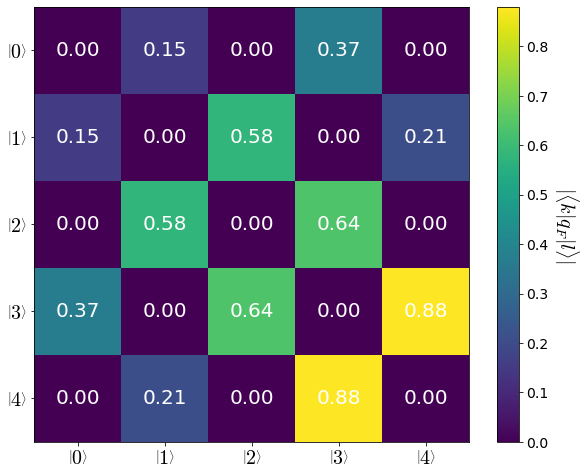

In [49]:
mat_elems_f = flx.mat_elements(operator='charge_op', levels=levels_f, as_xarray=True)
plot_setup = {'lw': 2.0, 'fs': 20, 'fs_text': 14, 'ls': 14}

def plot_mat_elem(
    mat_elems: xarray.core.dataarray.DataArray, 
    levels: int, 
    opt: dict, 
    qubit: str
) -> None:
    levels_vec = range(levels)
    level_labels = [r'$\left|{}\right\rangle$'.format(level) for level in levels_vec]
    fig, ax = plt.subplots(figsize=(10,8))
    plt.imshow(np.abs(mat_elems.data), cmap='viridis')
    for in_level, out_level in product(levels_vec, repeat=2):
        amplitude = abs(mat_elems.sel(in_level=in_level, out_level=out_level))
        ax.text(in_level, out_level, '{:.2f}'.format(float(amplitude)), ha="center", va="center",
                color="white", fontsize=opt['fs'])
    ax.set_xticks(levels_vec)
    ax.set_yticks(levels_vec)
    ax.set_xticklabels(level_labels, fontsize=opt['fs'])
    ax.set_yticklabels(level_labels, fontsize=opt['fs'])

    cbar = plt.colorbar()
    if qubit=='flx':
        cbar.ax.set_ylabel(r"$|\langle k | q_F | l \rangle |$", rotation=-90, va="bottom", fontsize=opt['fs'])
    else:
        cbar.ax.set_ylabel(r"$|\langle k | q_T | l \rangle |$", rotation=-90, va="bottom", fontsize=opt['fs'])
        
    cbar.ax.tick_params(axis='both', labelsize=opt['ls'])
    #ax.set_title(qubit + ' matrix elements', fontsize=opt['fs'])
    plt.savefig(qubit + "_mat_elem.svg")
    plt.show()

plot_mat_elem(mat_elems_f, levels_f, plot_setup, 'flx')

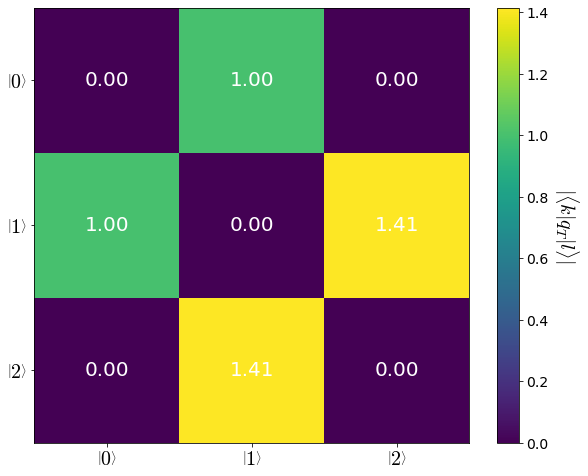

In [50]:
mat_elems_t = transm.mat_elements(operator='charge_op', levels=3, as_xarray=True)
plot_setup = {'lw': 2.0, 'fs': 20, 'fs_text': 14, 'ls': 14}

plot_mat_elem(mat_elems_t, levels_t, plot_setup, 'transm')

In [44]:
transm.charge_zpf

0.9999999999999999